In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load in dataframe that I will do EDA on
df = pd.read_csv('../data/cleaning_data_phase2_Lucas.csv.zip')
df.head(2)

,_smoker3,usenow3,ecignow1,_drnkwk1,_metstat,_imprace,_age80,_educag,ftjuda2_,frutda2_,grenda1_,frnchda_,potada1_,vegeda2_
0,former smoker,no,no,5.397605e-79,yes,white,70.0,highschool,5.397605e-79,100.0,57.0,4.300000e+01,14.0,100.0
1,never smoked,no,no,5.397605e-79,yes,black,67.0,graduated college,5.397605e-79,100.0,14.0,5.397605e-79,14.0,100.0


In [3]:
#load in data set that has our target variable of having heart disease
michd = pd.read_csv('../data/cleaning_data_phase2_Ran.csv.zip')
michd.head(2)

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No


In [4]:
#Add target variable to the dataframe of interest
df['_michd'] = michd['_michd'].map({'No' : 0, 'Yes': 1})

# Categorical Variables

## SMOKER3
Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker

In [51]:
#Count for each type of smoker
df['_smoker3'].value_counts()

never smoked      244013
former smoker     111829
everday smoker     38387
someday smoker     14711
missing             5571
Name: _smoker3, dtype: int64

In [53]:
#Frequency of Heart Disease for each type of smoker (percent)
pd.DataFrame(df.groupby('_smoker3')['_michd'].mean() * 100)

,_michd
_smoker3,
everday smoker,10.714565
former smoker,12.552200
missing,8.418596
never smoked,5.762808
someday smoker,9.346747


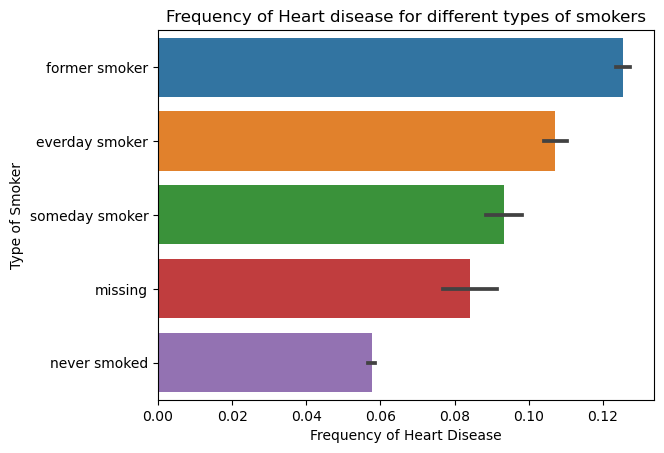

In [52]:
#order of smoker types in plot to make it look better
order = ['former smoker', 'everday smoker', 'someday smoker', 'missing', 'never smoked']

#plot
sns.barplot(data = df, y = '_smoker3',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of smokers')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of Smoker');

Significant differences in heart disease rates for different smoker groups, will be a good feature for models.

## USENOW3
Frequency of using chewing tobacco

In [54]:
#Count for each type of tobacco chewer
df['_smoker3'].value_counts()

never smoked      244013
former smoker     111829
everday smoker     38387
someday smoker     14711
missing             5571
Name: _smoker3, dtype: int64

In [55]:
#Frequency of Heart Disease for each type of tobacco chewer (percent)
pd.DataFrame(df.groupby('usenow3')['_michd'].mean() * 100)

,_michd
usenow3,
every day,9.112241
missing,8.066298
no,8.212219
not sure,10.810811
refused,7.509881
some days,7.268682


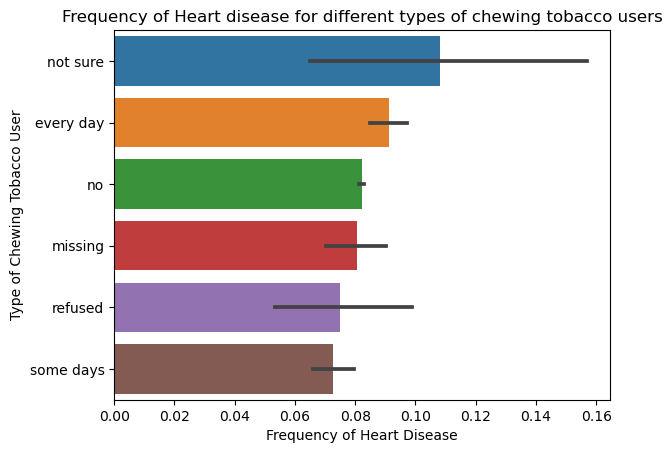

In [56]:
#order of smoker types in plot to make it look better
order = ['not sure', 'every day', 'no', 'missing', 'refused', 'some days']

#plot
sns.barplot(data = df, y = 'usenow3',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of chewing tobacco users')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of Chewing Tobacco User');

Not significant differences between different groups, will not be a good predictor.

## ECIGNOW1
Do you now use e-cigarettes, every day, some days, or not at all?

In [58]:
#Count for each type of e-cig users
df['ecignow1'].value_counts()

no          307990
never        82978
somedays     10182
everyday      8977
missing       3648
refused        497
not sure       239
Name: ecignow1, dtype: int64

In [68]:
#Frequency of Heart Disease for each type of e-cig chewer (percent)
pd.DataFrame(df.groupby('ecignow1')['_michd'].mean() * 100)

,_michd
ecignow1,
everyday,4.489250
missing,7.867325
never,8.044301
no,8.471054
not sure,12.552301
refused,7.042254
somedays,5.264192


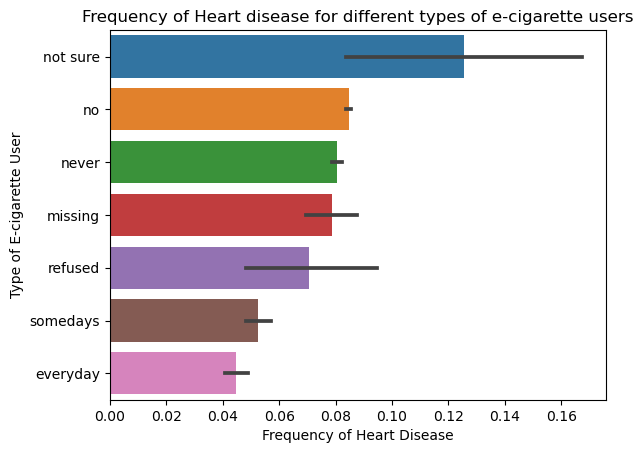

In [65]:
#order of plot to make it look better
order = ['not sure', 'no', 'never', 'missing', 'refused', 'somedays', 'everyday']

#plot
sns.barplot(data = df, y = 'ecignow1',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of e-cigarette users')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of E-cigarette User');

Interesting that those who say not sure had the highest percentage of heart disease. This could be due to the small amount of people that were unsure. Also, every day users of e-cigs had the lowest, I wonder if this is because it is correlated with age; more young people use e-cigarettes.

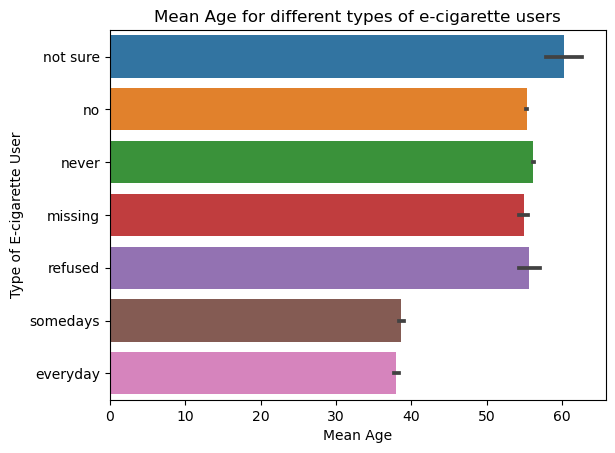

In [80]:
#order of plot to make it look better
order = ['not sure', 'no', 'never', 'missing', 'refused', 'somedays', 'everyday']

#plot
sns.barplot(data = df, y = 'ecignow1',  x = '_age80', orient = 'h', order = order)
plt.title('Mean Age for different types of e-cigarette users')
plt.xlabel('Mean Age')
plt.ylabel('Type of E-cigarette User');

As guessed above, every day e-cig users are younger. This may be why they have less frequency of heart disease.

## _METSTAT
Metropolitan Status

In [67]:
#Count for those who are in a metro area and those who are not
df['_metstat'].value_counts()

yes        283103
no         124596
missing      6812
Name: _metstat, dtype: int64

In [70]:
#Frequency of Heart Disease for people in metro are and those not(percent)
pd.DataFrame(df.groupby('_metstat')['_michd'].mean() * 100)

,_michd
_metstat,
missing,7.486788
no,9.786028
yes,7.542485


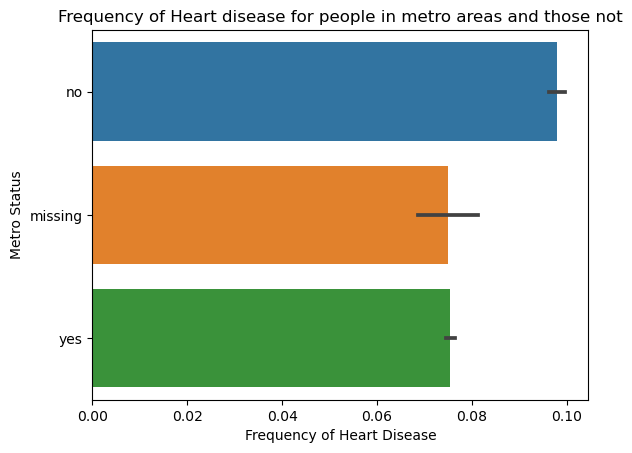

In [71]:
#order of plot to make it look better
order = ['no', 'missing', 'yes']

#plot
sns.barplot(data = df, y = '_metstat',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for people in metro areas and those not')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Metro Status');

People in a metro are have lower frequency of heart disease, could be a good predictor in our models.

## _IMPRACE
Imputed race/ethnicity value (If no response, imputed with most common race for that region)

In [73]:
#Count for different races
df['_imprace'].value_counts()

white              315667
hispanic            36145
black               30488
other race          14654
asian               10630
native american      6927
Name: _imprace, dtype: int64

In [83]:
#Frequency of Heart Disease for different races (percent)
pd.DataFrame(df.groupby('_imprace')['_michd'].mean() * 100)

,_michd
_imprace,
asian,3.142051
black,7.311073
hispanic,5.018675
native american,10.177566
other race,8.543742
white,8.782039


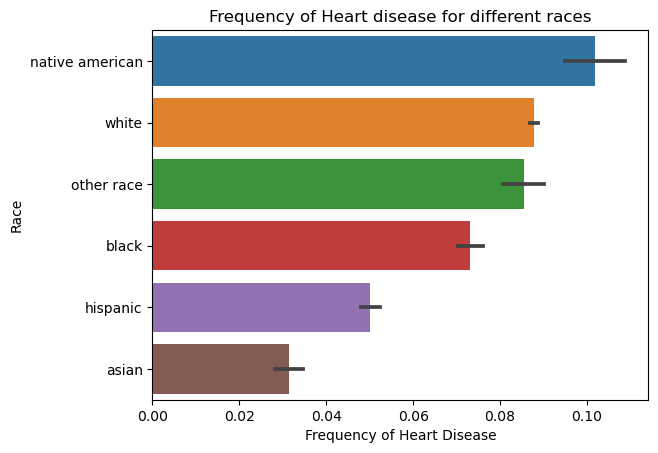

In [77]:
#order
order = ['native american', 'white', 'other race', 'black', 'hispanic', 'asian']

#plot
sns.barplot(data = df, y = '_imprace',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different races')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Race');

People who are asian have very low frequency of heart disease. Native americans have the highest. This will be a good feature in the model for prediction.

## _EDUCAG
Level of education completed

In [89]:
#Count
df['_educag'].value_counts()

graduated college    170496
attended college     114027
highschool           104345
no highschool         23877
missing                1766
Name: _educag, dtype: int64

In [90]:
#Frequency of Heart Disease for different education levels (percent)
pd.DataFrame(df.groupby('_educag')['_michd'].mean() * 100)

,_michd
_educag,
attended college,8.719865
graduated college,6.211876
highschool,9.847142
missing,7.361268
no highschool,13.054404


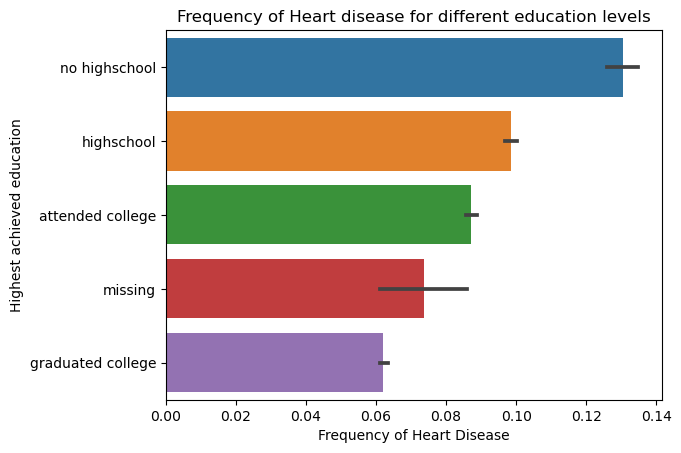

In [7]:
#order of smoker types in plot to make it look better
order = ['no highschool', 'highschool', 'attended college','missing', 'graduated college']

#plot
sns.barplot(data = df, y = '_educag',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different education levels')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Highest achieved education');

# Numercal Variables

## _DRNKWK1
Calculated total number of alcoholic beverages consumed per week.

In [19]:
#quick stats
df['_drnkwk1'].describe().round()

count    399386.0
mean        287.0
std         898.0
min           0.0
25%           0.0
50%          23.0
75%         233.0
max       53200.0
Name: _drnkwk1, dtype: float64

In [6]:
#Those diagnosed with heart disease drink less on average
df.groupby('_michd')['_drnkwk1'].mean()

_michd
0    292.398831
1    223.998543
Name: _drnkwk1, dtype: float64

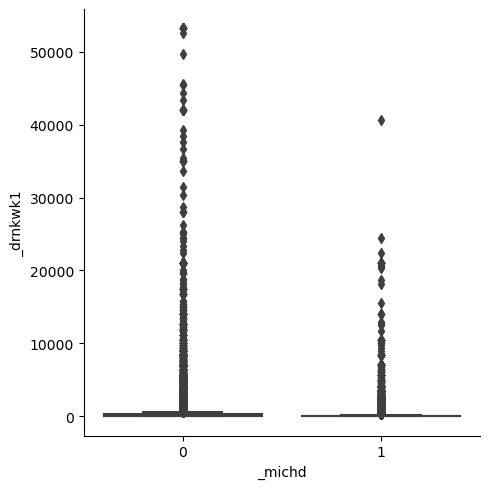

In [14]:
sns.catplot(data= df, y = '_drnkwk1', x = "_michd", kind="box")